In [37]:
from scipy import stats
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.tri as tri
from matplotlib.colors import ListedColormap
from IPython.display import Image

## Generating synthetic data

In [71]:
F = 2 # number of features
K = 3 # number of classes of output
Nclass1 = 500 # number of points per class
Nclass2 = 300 # number of points per class
Nclass3 = 100 # number of points per class
np.random.seed(0)
#generating input
X_a = np.random.randn(Nclass1,F)+np.array([0,-2])
#X_a = np.random.normal(scale=1.0, size=(Nclass1,F))+np.array([0,-2])
X_b = np.random.randn(Nclass2,F)+np.array([2,2])
X_c = np.random.randn(Nclass3,F)+np.array([-2,2])
X = np.vstack([X_a,X_b,X_c])
# generating some 3-class output                                                                                                                                                                        
t = np.array([0]*Nclass1 + [1]*Nclass2+ [2]*Nclass3)

## <font color='red'>homework: try generating data as above, from different Gaussian distributions, and perform the classification to see how the decision boundaries become non-linear</font> 

<font color='red'>for example change the variance of the Gaussians, by sampling from a generic normal distribution as: </font>

X_a = np.random.normal(scale=2.0, size=(Nclass1,F))+np.array([0,-2])

<font color='red'>where the parameter 'scale' is what gives the variance. See corresponding numpy documentation</font>

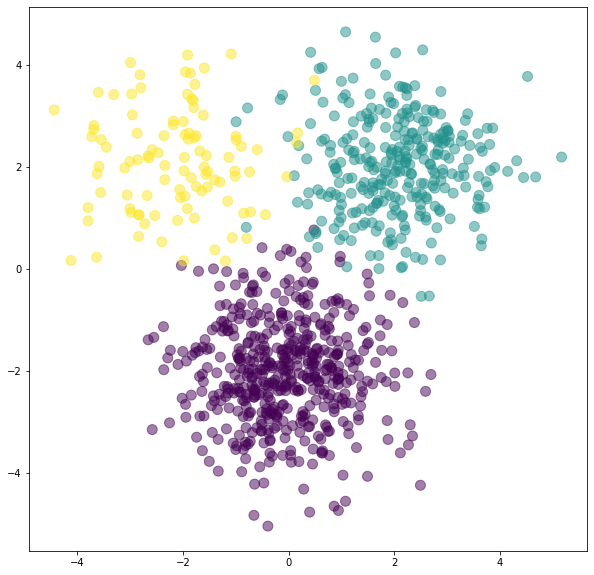

In [72]:
plt.scatter(X[:,0],X[:,1],c=t,s=100,alpha=0.5)
plt.show()

## get the means $\vec\mu_k$ of each class

In [55]:
def get_means(X,t,K):
    # K: number of classes
    Mu = []
    for k in range(K):
        Mu.append( np.mean(X[np.where(t==k)],axis=0) )
    return np.array(Mu)

In [73]:
Mu=get_means(X,t,3)
print(Mu)

[[-0.06536569 -2.02514773]
 [ 2.05357716  2.01442144]
 [-2.11503634  2.11396184]]


## get the standard deviations $\vec\sigma_k$ of each class

In [57]:
def get_stds(X,t,K):
    # K: number of classes
    Sigma = []
    for k in range(K):
        Sigma.append( np.std(X[np.where(t==k)],axis=0,ddof=1) )
    return np.array(Sigma)

In [74]:
Sigma=get_stds(X,t,3)
print(Sigma)

[[0.97452117 1.00093546]
 [0.98928839 0.94512094]
 [1.01379741 1.00042373]]


## get the priors (fractions) of each class

In [59]:
def get_priors(t):
    classes = np.unique(t)
    priors = []
    for c in classes:
        priors.append(len(t[np.where(t==c)]))
    return np.array(priors)/len(t)

In [75]:
priors=get_priors(t)
print(priors)

[0.55555556 0.33333333 0.11111111]


### this is the log of a Gaussian (likelihood), and the log of the joint (unnormalized posterior)

In [15]:
def logG(x,mu,sig):
    '''
    scope: this is the log of a Normal
    '''
    return -(x-mu)**2/2./sig**2 + np.log(1/np.sqrt(2*np.pi)/sig**2)

def logPost(Xnew,means,stds,prior):
    '''
    scope: this is the ln of the posterior of class k, without normalisation
           it assumes all variables are normally distributed
    '''
    D = len(Xnew)
    logLike=0.
    for d in range(D):
        logLike += logG(Xnew[d],means[d],stds[d])
    return logLike + np.log(prior)

### this is the prediction for the class of a new point $\vec x_{\rm new}$

In [ ]:
def pred_arr(Xnew, Mu, Sigma, priors):
    """
    Xnew: (N, D) test points
    Mu: (K, D) means
    Sigma: (K, D) stds
    priors: (K,) prior probabilities
    """
    N, D = Xnew.shape
    K = Mu.shape[0]
    
    # Compute log-posterior for all K classes
    log_posts = np.zeros((N, K))

    for k in range(K):
        diff = Xnew - Mu[k]  # shape: (N, D)
        log_likelihood = -0.5 * np.sum(((diff / Sigma[k]) ** 2) + 2 * np.log(Sigma[k]), axis=1)
        log_prior = np.log(priors[k])
        log_posts[:, k] = log_likelihood + log_prior

    return np.argmax(log_posts, axis=1)


## results

In [76]:
Xtest=-6 + 12*np.random.rand(1000,2)
# Define the range of the grid
x_min, x_max = Xtest[:, 0].min() - 1, Xtest[:, 0].max() + 1
y_min, y_max = Xtest[:, 1].min() - 1, Xtest[:, 1].max() + 1
h = 0.02  # grid step size

# Generate mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

# Flatten and predict over the grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z = pred_arr(grid,Mu,Sigma,priors)
Z = Z.reshape(xx.shape)

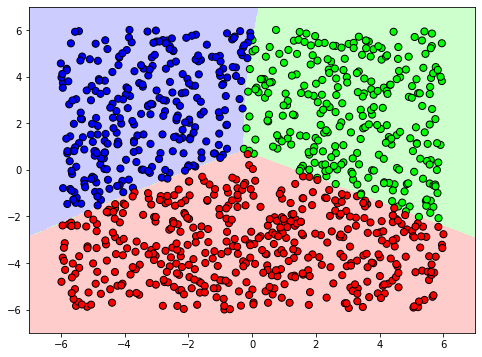

In [77]:
# Define colormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=(x_min, x_max, y_min, y_max),
               origin='lower', cmap=cmap_light, alpha=0.6, aspect='auto')
scatter = plt.scatter(Xtest[:, 0], Xtest[:, 1], c=pred_arr(Xtest,Mu,Sigma,priors), cmap=cmap_bold, edgecolor='k', s=50)


In [78]:
def accuracy(y_pred,y):
    count=0
    for i in range(len(y)):
        if y_pred[i] == y[i]:
            count += 1
    return count/len(y)

In [79]:
y_pred=pred_arr(X,Mu,Sigma,priors)
print('classification rate =', accuracy(y_pred,t))


classification rate = 0.9866666666666667
